<a href="https://colab.research.google.com/github/Champjiwrd/CE63-21-ObjectDetection/blob/master/Test_Color_distinguish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Google Drive###

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/CEProject63-21ObjectDetection/dataset/ourdataset/ /dataset
# /mydrive/CEProject63-21ObjectDetection/dataset/ourdataset/cp_annotation/0024b8088a11fdbf19edce3e113aac72.txt

###Crop Image###
return รูป ใช้ pillow

crop_img(path,aw,bh,dw,ch)

In [11]:
def checkcolor(hue,sat,lgt,listcolor):
  if (lgt < 0.1):
    listcolor[0]+=1 #black
    return listcolor
  if (lgt > 0.8):
    listcolor[1]+=1 #white
    return listcolor
  if (hue < 15):
    listcolor[2]+=1 #red
    return listcolor
  if (hue <35):
    listcolor[3]+=1 #orange
    return listcolor
  if (hue < 70):
    listcolor[4]+=1 #yellow
    return listcolor
  if (hue < 150):
    listcolor[5]+=1 #green
    return listcolor
  if (hue < 210):
    listcolor[6]+=1 #cyan
    return listcolor
  if (hue < 270):
    listcolor[7]+=1 #blue
    return listcolor
  if (hue < 330):
    listcolor[8]+=1 #magenta
    return listcolor
  listcolor[2]+=1   #red
  return listcolor

In [9]:
from PIL import Image
def cropimg(path,aw,bh,dw,ch):
  image = Image.open(path)
  width, height = image.size
  a,b,c,d = getObjPosition(width,height,aw,bh,dw,ch)
  x,y = getStartPosition(a,b,c,d)
  box = (x, y, x+d, y+c)
  cropped_image = image.crop(box)
  return cropped_image
def getObjPosition(width,height,aw,bh,dw,ch):
  a = aw*width
  b = bh*height
  c = ch*height
  d = dw*width
  return a,b,c,d
def getStartPosition(a,b,c,d):
  x = a-d/2
  y = b-c/2
  return(x,y)

In [10]:
def rgb_to_hls(r, g, b):
    #r, g, b = [x/255.0 for x in [r, g, b]]
    r = float(r)
    g = float(g)
    b = float(b)
    high = max(r, g, b)
    low = min(r, g, b)
    l = (high + low)/2

    if high == low:
        h = 0.0
        s = 0.0
    else:
        d = high - low
        s = d / (2 - high - low) if l > 0.5 else d / (high + low)
        if high == r:
          h = (g - b) / d + (6 if g < b else 0)
        elif high == g:
          h = (b - r) / d + 2
        else:
          h = ((r - g) / d) + 4
        
        h *= 60

    return h, l, s

In [6]:
import colorsys
def findColorImg(pathimg,pathtxt):
  f = open(pathtxt, "r")
  c = f.read()
  f.close()
  c = c.split('\n')
  print(c)
  img = Image.open(pathimg)
  display(img)
  llllll = ''
  for f1 in c[:-1]:
    f1 = f1.split(' ')
    print(f1)
    img = cropimg(pathimg,float(f1[1]), float(f1[2]), float(f1[3]), float(f1[4]))
    rgb_img = img.convert('RGB')
    listcolor = [0,0,0,0,0,0,0,0,0,0] # 0blacks, 1whites, 2gray, 3red, 4yellow, 5green, 6cyan, 7blue, 8magenta, 9reds
    width, height = img.size
    for i in range(width):
      for j in range(height):
        r, g, b = rgb_img.getpixel((i,j)) #h, l, s = rgb_to_hsl(r, g, b)
        r, g, b = [x/255.0 for x in [r, g, b]]
        h, l, s = rgb_to_hls(r, g, b)
        checkcolor(h,s,l,listcolor)
    print(listcolor)
    color = int(listcolor.index(max(listcolor)))
    f1[0] = color
    print(f1)
    display(rgb_img)
    llllll += str(color)+' '+str(f1[1])+' '+str(f1[2])+' '+str(f1[3])+'\n'
  return llllll

In [27]:
import colorsys
from PIL import Image
import numpy,cv2
def findColorImg2(pathimg,pathtxt):
  f = open(pathtxt, "r")
  c = f.read()
  f.close()
  c = c.split('\n')
  imShow(pathimg)
  llllll = ''
  img = Image.open(pathimg)
  for f1 in c[:-1]:
    f1 = f1.split(' ')
    img = cropimg(pathimg,float(f1[1]), float(f1[2]), float(f1[3]), float(f1[4]))
    rgb_img = img.convert('RGB')
    listcolor = [0,0,0,0,0,0,0,0,0,0] # 0blacks, 1whites, 2gray, 3red, 4yellow, 5green, 6cyan, 7blue, 8magenta
    width, height = img.size
    for i in range(width):
      for j in range(height):
        r, g, b = rgb_img.getpixel((i,j)) #h, l, s = rgb_to_hsl(r, g, b)
        r, g, b = [x/255.0 for x in [r, g, b]]
        h, l, s = rgb_to_hls(r, g, b)
        checkcolor(h,s,l,listcolor)
    display(rgb_img)
    image = numpy.array(rgb_img)
    #im = cv2.imread(pathimg)
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    #im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



    imShow(imgray)
    print(listcolor)
    color = int(listcolor.index(max(listcolor)))
    print(color)
    print("0blacks, 1whites, 2red, 3orange, 4yellow, 5green, 6cyan, 7blue, 8magenta")
    #color = input("Select color:")
    f1[0] = color
    print(f1)
    print("-----------------------------")
    llllll += str(color)+' '+str(f1[1])+' '+str(f1[2])+' '+str(f1[3])+'\n'
  return llllll

In [3]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

###Crop Image###

In [ ]:
%cd /content/gdrive/.shortcut-targets-by-id/1hQoqbcLdIKP1y1vE2waDf28rLEbA3yqR/CEProject63-21ObjectDetection/dataset/ourdataset/

/content/gdrive/.shortcut-targets-by-id/1hQoqbcLdIKP1y1vE2waDf28rLEbA3yqR/CEProject63-21ObjectDetection/dataset/ourdataset


In [ ]:
!pwd

/content/gdrive/.shortcut-targets-by-id/1hQoqbcLdIKP1y1vE2waDf28rLEbA3yqR/CEProject63-21ObjectDetection/dataset/ourdataset


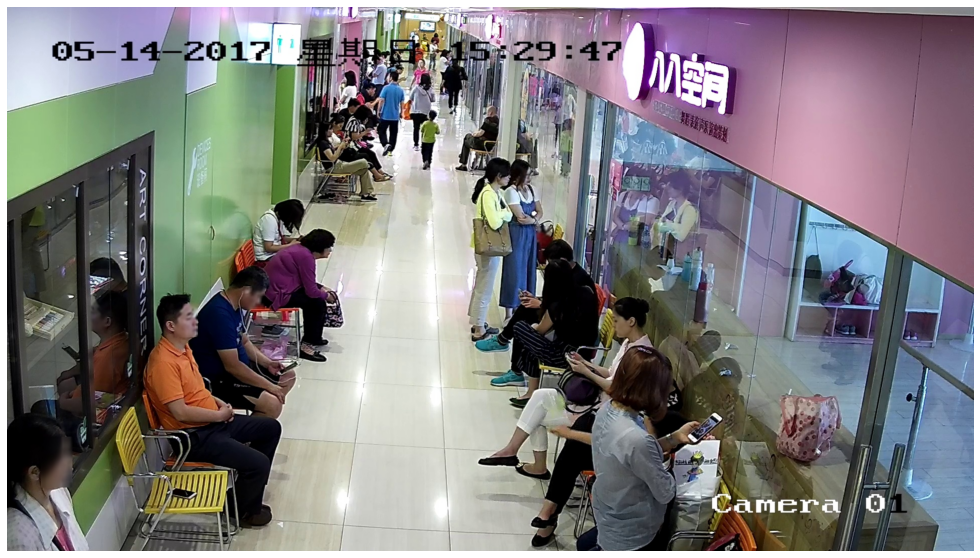

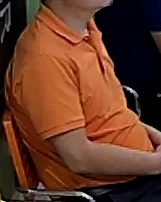

SystemError: ignored

In [28]:
findColorImg2("/dataset/cp/024bb10a9cf0ab4992d6a20d13890833.jpg","/dataset/cp_annotation/024bb10a9cf0ab4992d6a20d13890833.txt")

In [ ]:
from os import listdir, getcwd
from os.path import join,isfile
extensions = ['.txt']
mypath_ex = '/content/gdrive/.shortcut-targets-by-id/1hQoqbcLdIKP1y1vE2waDf28rLEbA3yqR/CEProject63-21ObjectDetection/dataset/ourdataset/ai'
path = getcwd()
files = [f for f in listdir(mypath_ex) if any(f.endswith(ext) for ext in extensions) ]
for e in files: 
  if isfile(e.replace('.txt','.jpg')):
    f = e.replace('.txt','.jpg')
  if isfile(e.replace('.txt','.jpeg')):
    f = e.replace('.txt','.jpeg')
  if isfile(e.replace('.txt','.png')):
    f = e.replace('.txt','.png')
  print(f,e)
  resss = findColorImg(f,e) 
  list_file = open(e, 'w')
  list_file.write(resss)
  list_file.close()